In [1]:
### Way too many imports from previous attempts, clean up later

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
import torch.nn.functional as F
from time import sleep
from tqdm.notebook import tqdm
import cv2
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import sklearn
from sklearn.model_selection import train_test_split

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, RegexLabeller

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.metrics import error_rate

from fastai.vision.all import *
from fastai.vision.augment import *
from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageDataLoaders, ImageBlock
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet34, resnet50

%matplotlib inline

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  ## Very unelegant, fix dependency conflict later

In [2]:
img_folder = 'archive\\birdsongs_images_ordered' ### Load Mel Spectrogram Images in RGB 224x224 format

In [3]:
path = img_folder ### Just to keep old namings

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


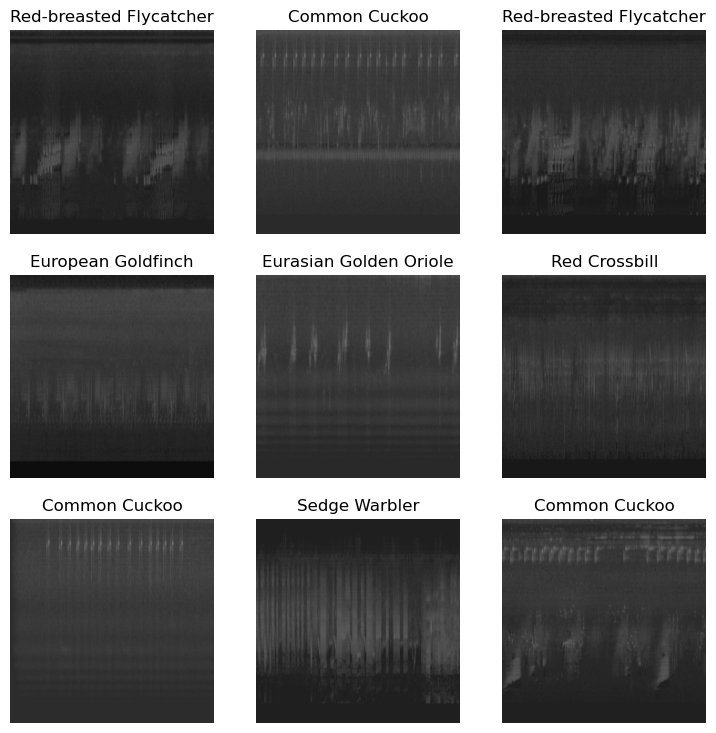

In [4]:
dls = ImageDataLoaders.from_folder(path, valid_pct = 0.15) ### Get 15% validation set, use FastAI from hereon
dls.show_batch() ### Show samples

In [5]:
dls.vocab, len(dls.vocab) ### Check if categories are right

(['Barn Swallow', 'Bluethroat', "Blyth's Reed Warbler", 'Boreal Owl', 'Cirl Bunting', 'Coal Tit', 'Common Blackbird', 'Common Chaffinch', 'Common Chiffchaff', 'Common Cuckoo', 'Common Grasshopper Warbler', 'Common Linnet', 'Common Nightingale', 'Common Redstart', 'Common Reed Bunting', 'Common Rosefinch', 'Common Whitethroat', 'Corn Bunting', 'Corn Crake', 'Eurasian Blackcap', 'Eurasian Blue Tit', 'Eurasian Bullfinch', 'Eurasian Eagle-Owl', 'Eurasian Golden Oriole', 'Eurasian Pygmy Owl', 'Eurasian Skylark', 'Eurasian Wren', 'European Goldfinch', 'European Greenfinch', 'European Nightjar', 'European Pied Flycatcher', 'European Robin', 'Garden Warbler', 'Great Reed Warbler', 'Great Tit', 'Icterine Warbler', 'Lesser Whitethroat', 'Little Owl', 'Marsh Warbler', 'Ortolan Bunting', 'Red Crossbill', 'Red-breasted Flycatcher', 'Sedge Warbler', 'Song Thrush', 'Tawny Owl', 'Thrush Nightingale', 'Willow Warbler', 'Wood Warbler', 'Yellowhammer'],
 49)

C:\Users\edomu\IT\Anaconda3\envs\birdsongs\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\edomu\IT\Anaconda3\envs\birdsongs\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.002511886414140463)

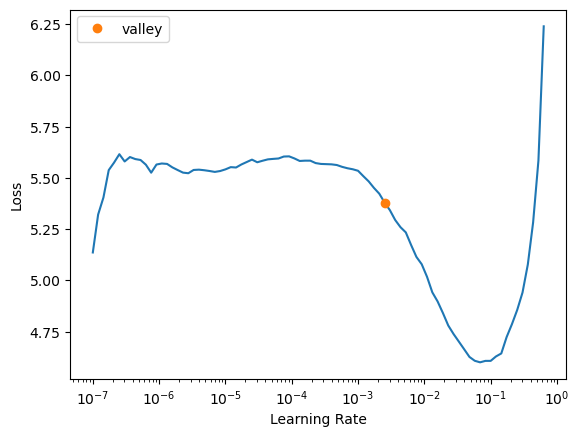

In [6]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate]) ### Load Resnet34 architecture, include mel spectrograms to learner instance
learn.lr_find() ### Find appropriate learning rate

In [7]:
learn.fit_one_cycle(50, 0.0025) ### Train the resnet34 with the data, use learning rate as previously optimized

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,4.603066,3.133714,0.236215,0.763785,22:59
1,3.388772,2.155051,0.462742,0.537258,12:35
2,2.390088,1.490676,0.605067,0.394933,12:34
3,1.661227,1.121252,0.694486,0.305514,12:33
4,1.156102,0.823233,0.774218,0.225782,12:33
5,0.851872,0.739187,0.792101,0.207899,12:46
6,0.689565,0.668353,0.809985,0.190015,12:45
7,0.572002,0.590916,0.831595,0.168405,12:44
8,0.489497,0.549013,0.850224,0.149776,12:37
9,0.438432,0.566318,0.847988,0.152012,12:34


In [ ]:
learn.recorder.plot_loss()

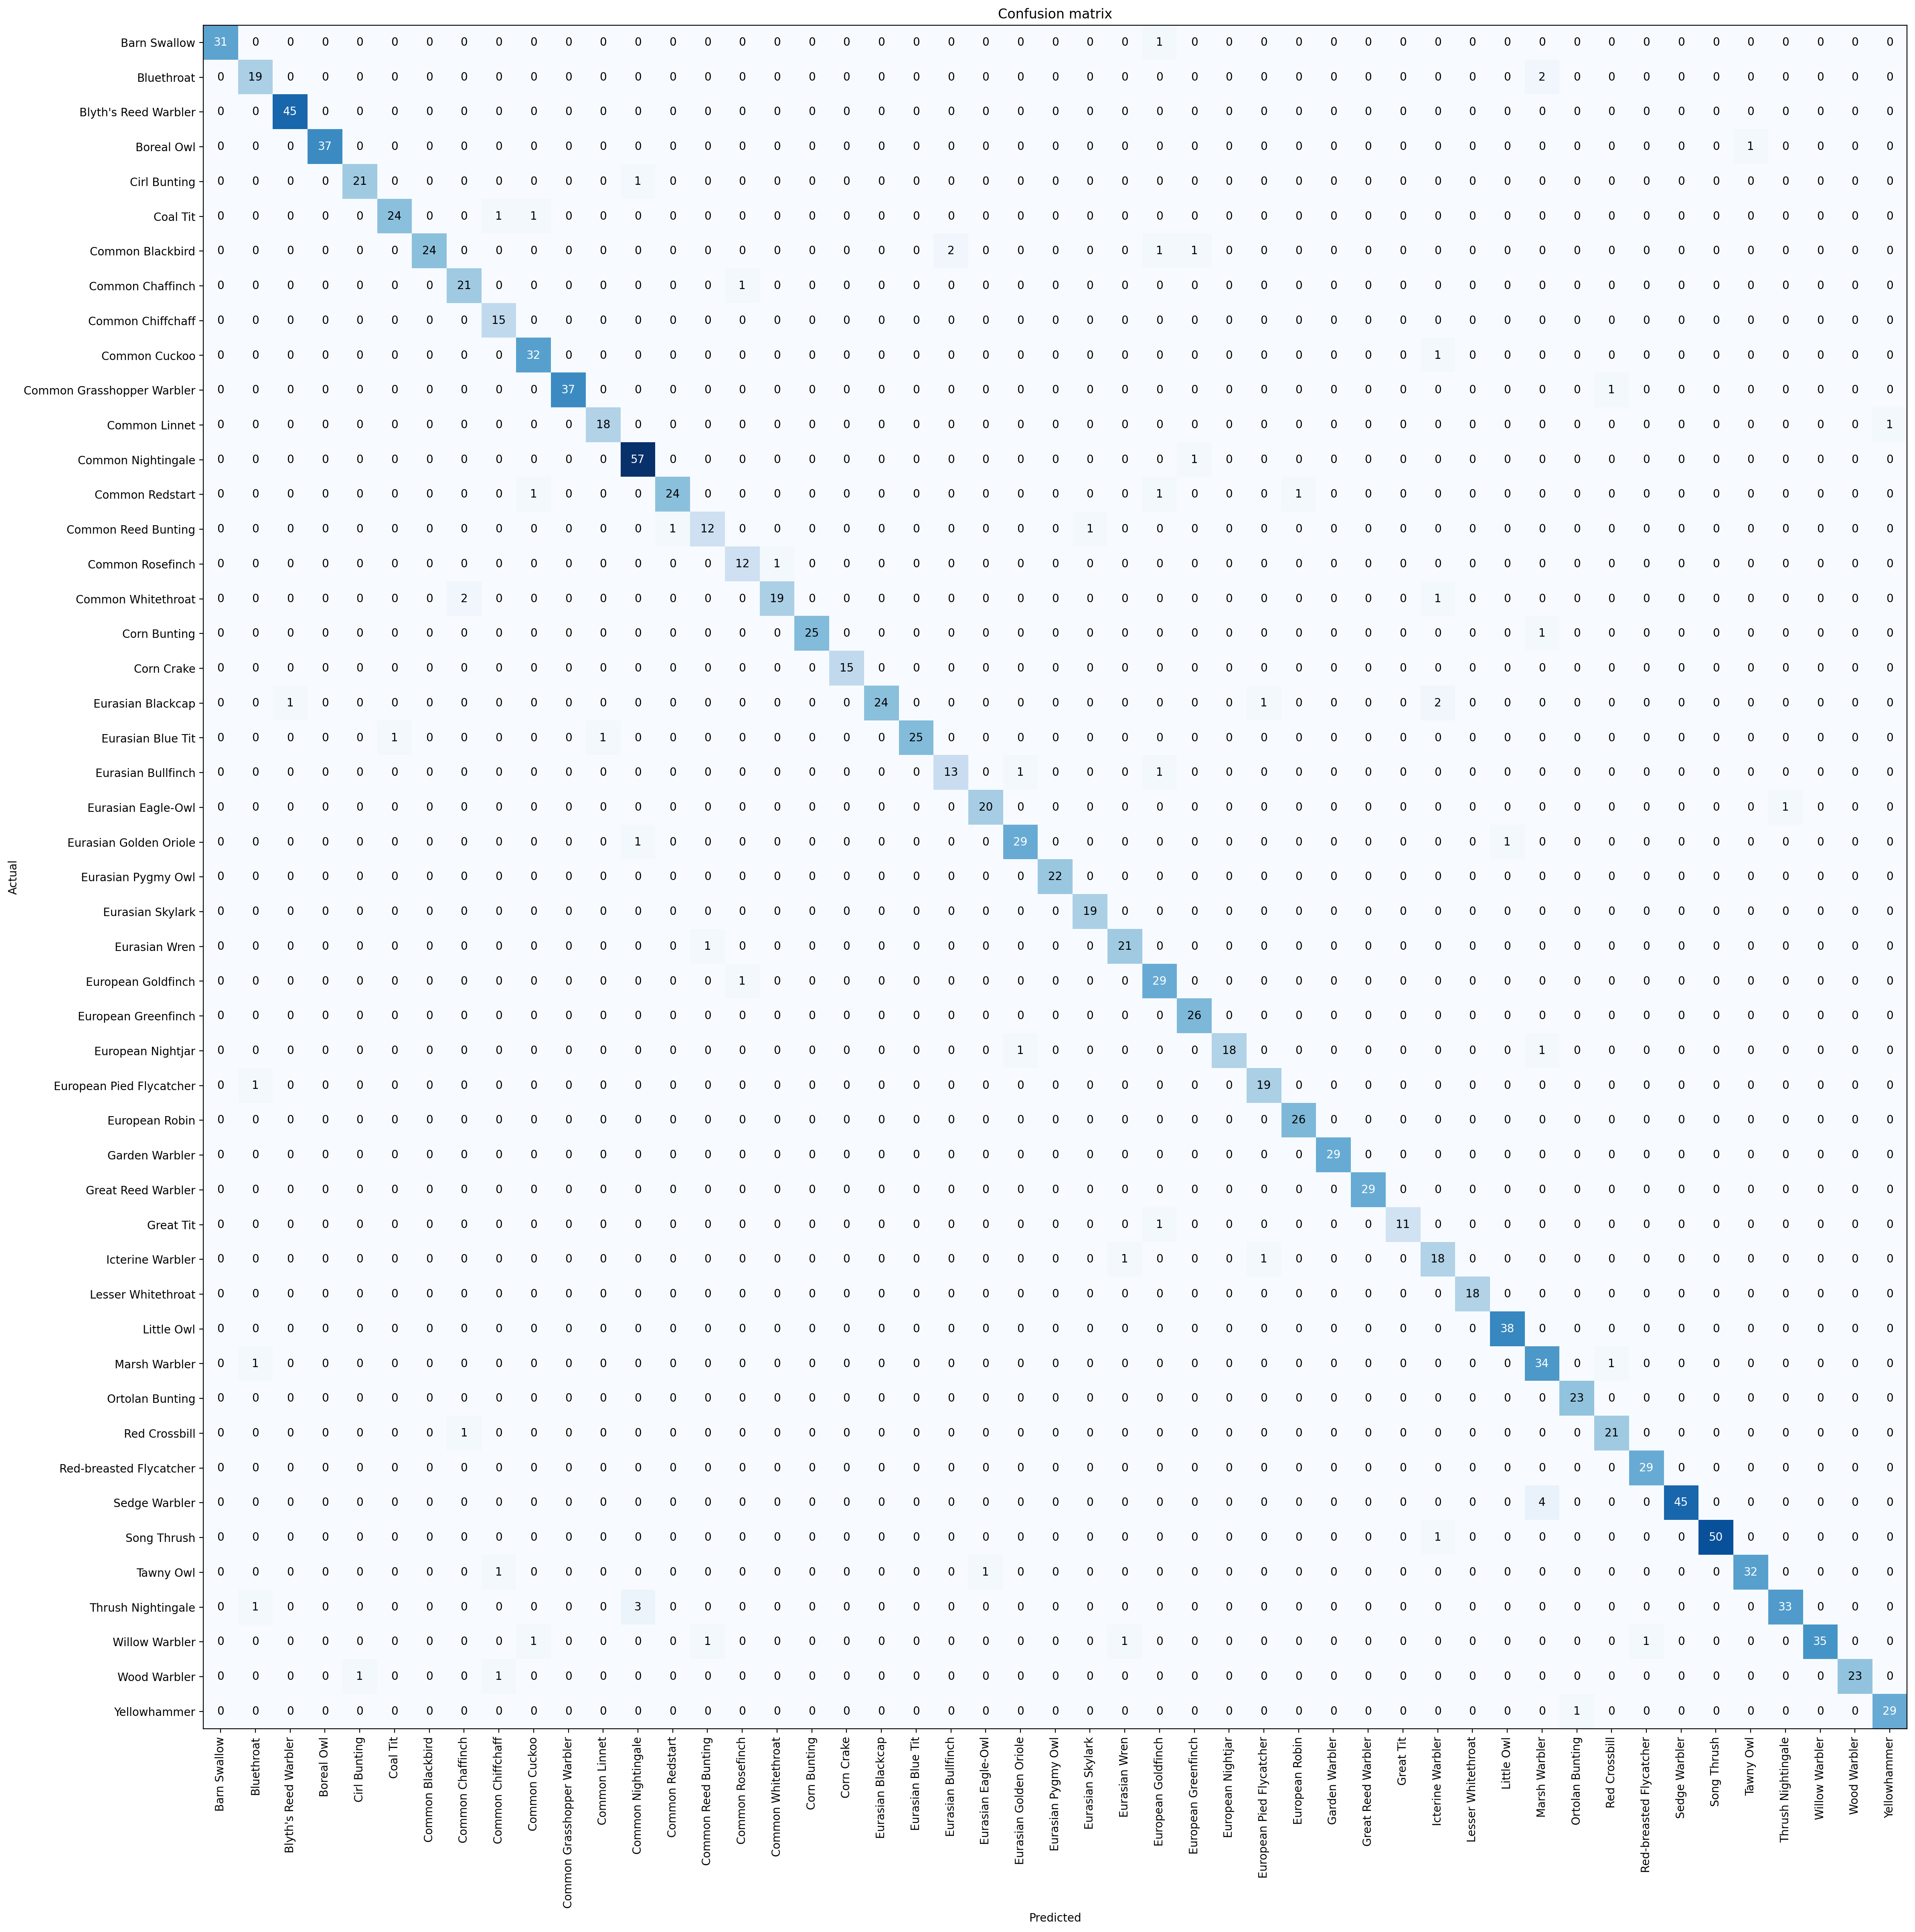

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

interp.plot_confusion_matrix(figsize = (24, 24), dpi=200)

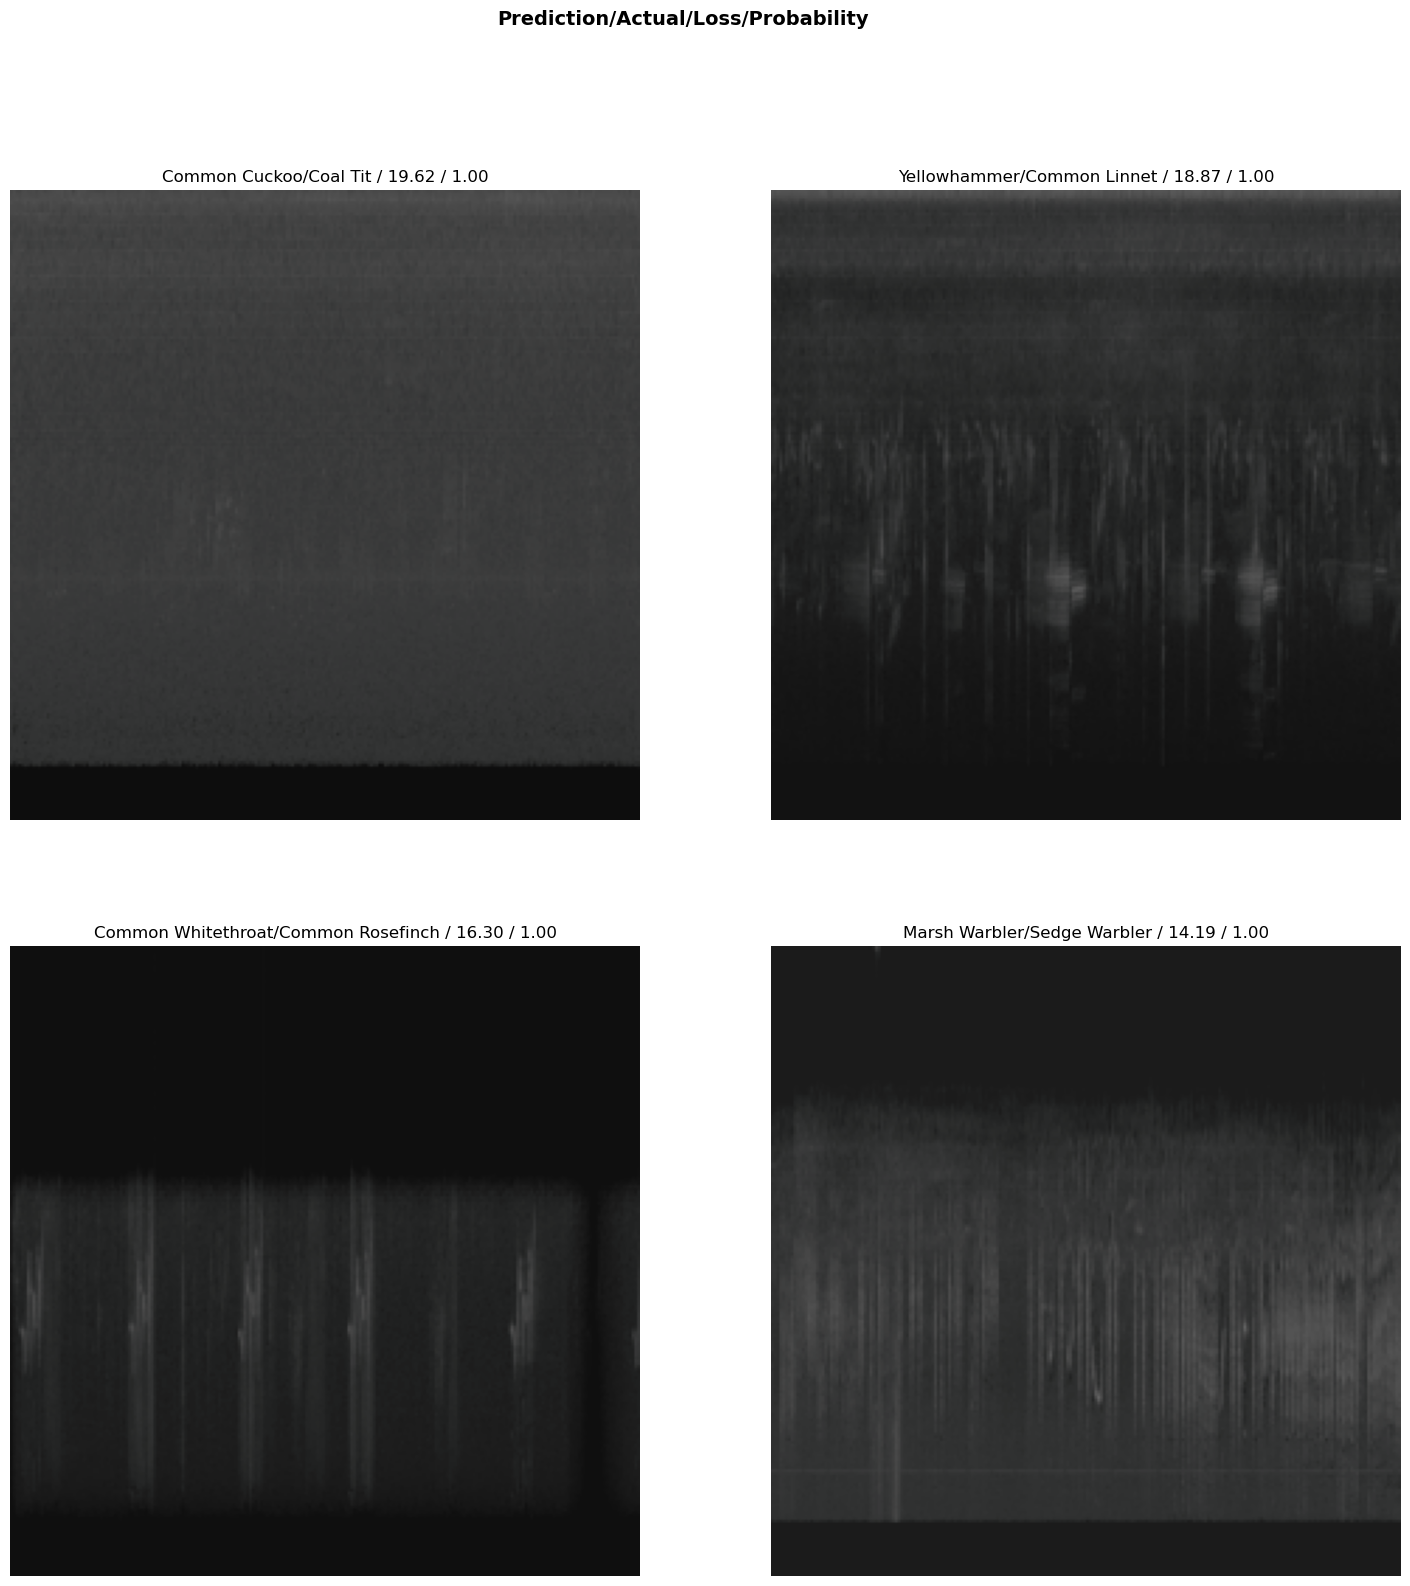

In [9]:
interp.plot_top_losses(4, figsize=(18,18))

In [10]:
learn.export('trained_model_50gen_no_soundscape.pkl')